In [1]:
#!/usr/bin/env python
# coding: utf-8
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from mpl_toolkits.basemap import Basemap

*If folium is not installed please use the following code to install the same* - ***!conda install -c conda-forge folium***

In [2]:
import folium
from folium import plugins

In [3]:
import os
os.chdir("/resources/data/Boston_Crime_data_analysis/")
os.listdir()

['boston_crime.csv']

In [4]:
df=pd.read_csv(r'boston_crime.csv', encoding='unicode_escape',low_memory=False)
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


***Define Pie plot function***

In [5]:
def pie_plot(list_number, list_unique):
    plt.figure(figsize=(20,10))
    plt.pie(list_unique, 
        labels=list_number,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.show()
    return 0

***Define bar chart function***

In [6]:
def bar_chart(list_number, list_unique,xlabel,ylabel):
    objects = list_unique
    y_pos = np.arange(len(objects))
    performance = list_number
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel(ylabel) 
    plt.xlabel(xlabel)
    plt.show()
    
    return 0

***Group count of Incidents by day of the week***

***Day when most of the crimes occurred***

In [7]:
#df_dy_crim=pd.DataFrame(df.groupby(['DAY_OF_WEEK']).count().INCIDENT_NUMBER.transform(max)).reset_index()
df_dy_crim=df.groupby(['DAY_OF_WEEK']).count().INCIDENT_NUMBER.reset_index(name='Number_of_incidents')
dy_mst_crm=df_dy_crim.sort_values(by=['Number_of_incidents'],ascending=False).head(1)
dy_mst_crm

,DAY_OF_WEEK,Number_of_incidents
0,Friday,49758


***The result above could be achieved using a single line of code as mentioned below as well***

In [8]:
df.groupby(['DAY_OF_WEEK']).count().INCIDENT_NUMBER.reset_index(name='Number_of_incidents').sort_values(by='Number_of_incidents', ascending=False).head(1)

,DAY_OF_WEEK,Number_of_incidents
0,Friday,49758


***Highest number of incidents for a particular crime occured in each year***

In [9]:
crm_typ_yr=df.groupby(['OFFENSE_CODE_GROUP','YEAR']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)
crm_typ_yr.head()

,OFFENSE_CODE_GROUP,YEAR,count
159,Motor Vehicle Accident Response,2017,12049
158,Motor Vehicle Accident Response,2016,11534
160,Motor Vehicle Accident Response,2018,8724
124,Larceny,2016,7903
147,Medical Assistance,2017,7817


***Group Crime types by Street***

In [10]:
loc_crm_typ=df.loc[0:,['OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','STREET']].groupby('STREET').agg(' ,'.join).reset_index()
loc_crm_typ['Lat']= df.loc[0:,['Lat']]
loc_crm_typ['Long']=df.loc[0:,['Long']]
loc_crm_typ.head()

,STREET,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,Lat,Long
0,ALBANY ST,"Robbery ,Investigate Person ,Vandalism ,Motor ...","ROBBERY - STREET ,INVESTIGATE PERSON ,VANDALIS...",42.262608,-71.121186
1,BLUE HILL AVE,"Auto Theft ,Investigate Person ,Larceny From M...","AUTO THEFT ,INVESTIGATE PERSON ,LARCENY THEFT ...",42.352111,-71.135311
2,COLUMBUS AVE,"Motor Vehicle Accident Response ,Simple Assault","M/V - LEAVING SCENE - PROPERTY DAMAGE ,ASSAULT...",42.308126,-71.076930
3,COMMONWEALTH AVE,"Operating Under the Influence ,Violations ,Inv...","OPERATING UNDER THE INFLUENCE ALCOHOL ,VAL - O...",42.359454,-71.059648
4,MASSACHUSETTS AVE,"Other ,Motor Vehicle Accident Response ,Motor ...","VIOLATION - CITY ORDINANCE ,M/V ACCIDENT INVOL...",42.375258,-71.024663


***Year wise crime count***

In [11]:
df_inc_by_yr=df.groupby('YEAR').count().INCIDENT_NUMBER.reset_index(name="Number of Incidents")
df_inc_by_yr_lbl=df['YEAR'].unique()
df_inc_by_yr_lbl

array([2018, 2017, 2016, 2015])

**A function to create lablel and data list for chart**

In [12]:
def create_list_number_crime(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(df.loc[df[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

In [13]:
create_list_number_crime('YEAR',df['YEAR'].unique())

(array([2018, 2017, 2016, 2015]), [74356, 100938, 99134, 53392])

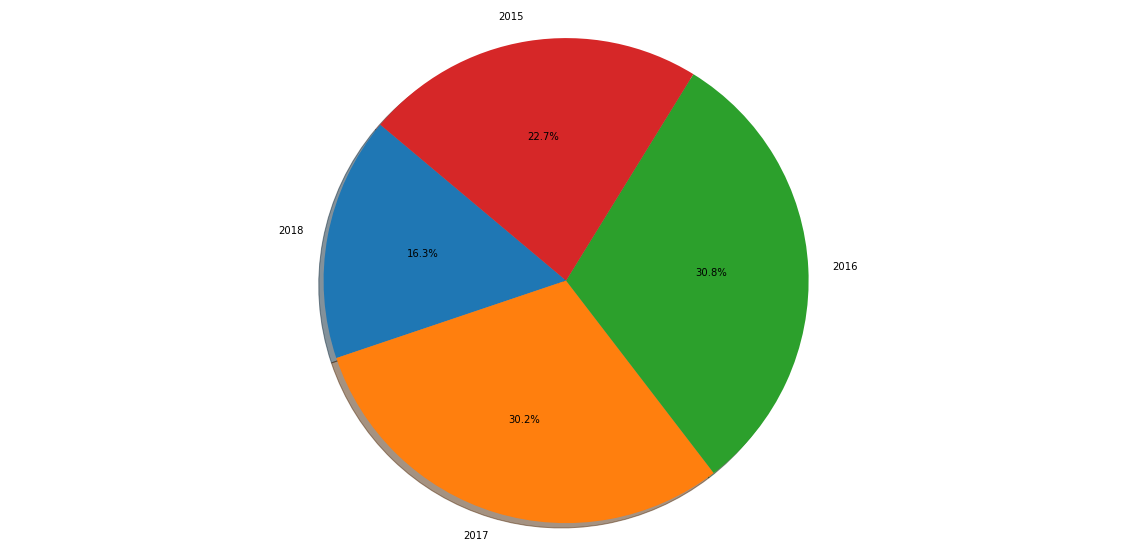

0

In [14]:
pie_plot(list(df['YEAR'].unique()),df_inc_by_yr['Number of Incidents'])

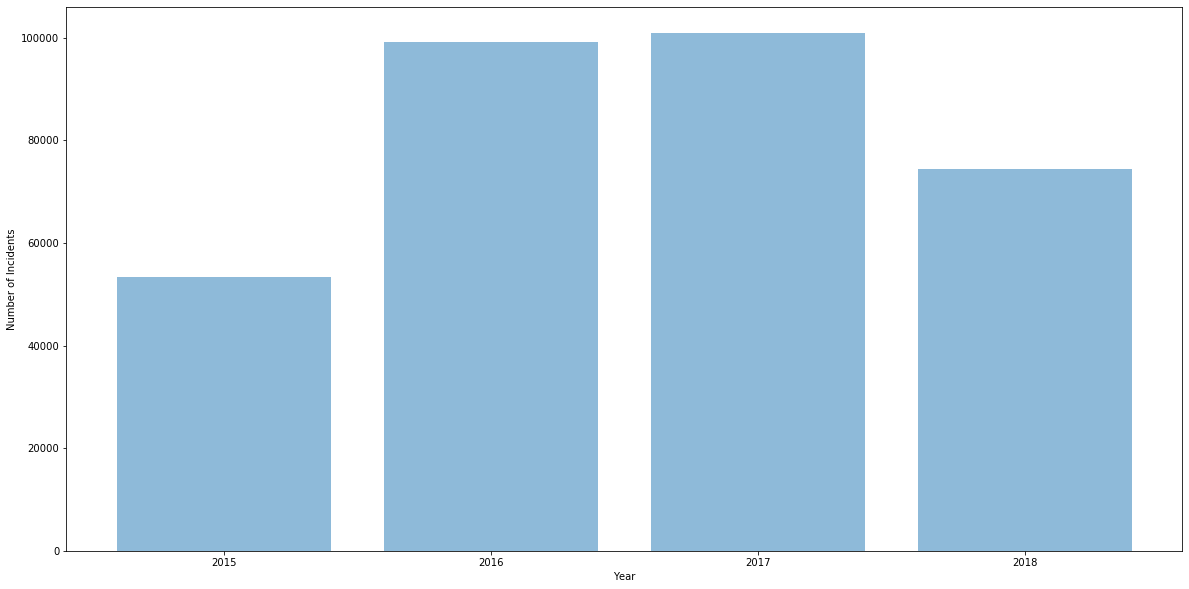

0

In [15]:
bar_chart(df_inc_by_yr['Number of Incidents'],df_inc_by_yr['YEAR'],'Year','Number of Incidents')

***Function to drop Nan values in the input variables***

In [16]:
def drop_NaN_two_var(x, y):

    df1 = df[[x, y]].dropna()
    print(df1.shape)

    x_value = df1[x]
    y_value = df1[y]

    del df1
        
    print(x + ': ' + str(x_value.shape))
    print(y + ': ' + str(y_value.shape))
        
    return x_value, y_value

***Month wise crime counts over the years***

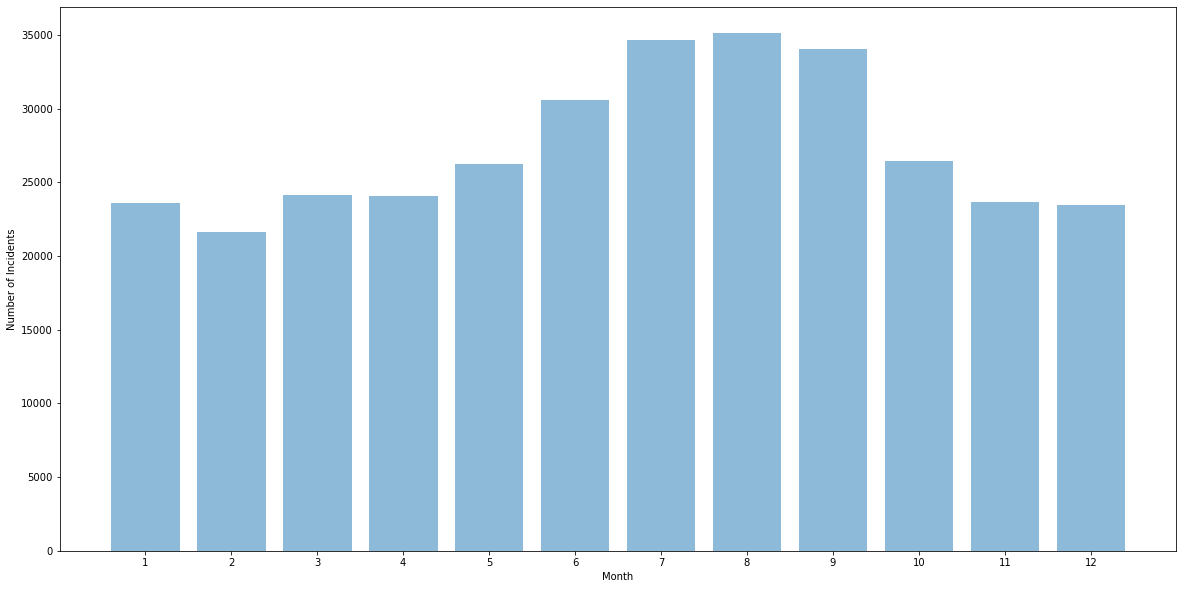

0

In [17]:
df_mnth_crm = df.groupby('MONTH').count().INCIDENT_NUMBER.reset_index(name='Number of Incidents')
bar_chart(df_mnth_crm['Number of Incidents'],df_mnth_crm['MONTH'],'Month','Number of Incidents')

***Day wise crime count over the years***

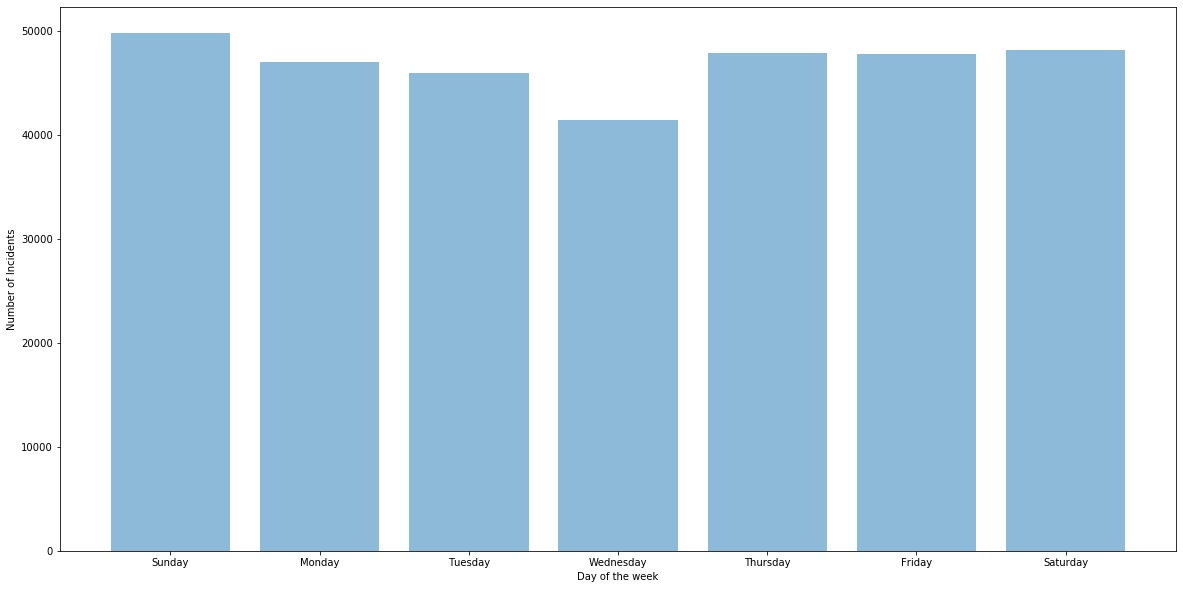

0

In [18]:
df_dy_crim=df.groupby(['DAY_OF_WEEK']).count().INCIDENT_NUMBER.reset_index(name='num_of_incidents')
df_dy_crim.head()
day_of_week=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
bar_chart(df_dy_crim['num_of_incidents'],day_of_week,'Day of the week','Number of Incidents')

***Hour wise Crime count over the years***

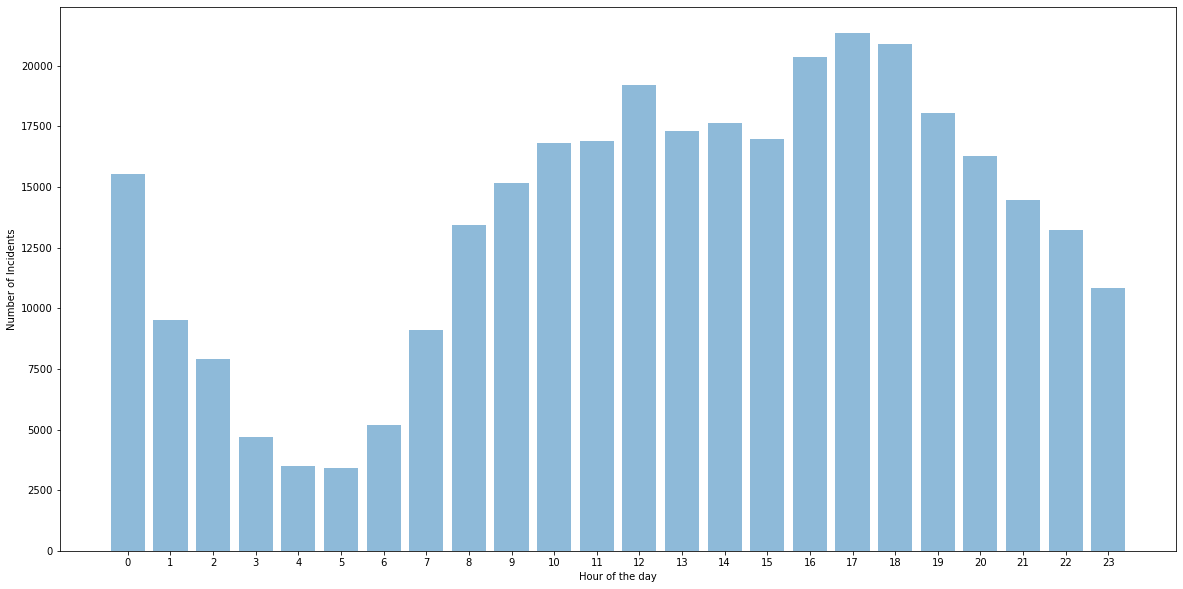

0

In [19]:
hr_num_crm=df.groupby('HOUR').count().INCIDENT_NUMBER.reset_index(name='num_of_inc')
hr_num_crm
bar_chart(hr_num_crm['num_of_inc'],hr_num_crm['HOUR'],'Hour of the day','Number of Incidents')

***Fill na in Shooting column and change it to Numerical category by mapping 0 values to 0 and 'Y' values to 1***

In [20]:
df['SHOOTING'].fillna(0,inplace=True)

df['SHOOTING'] = df['SHOOTING'].map({
    0: 0,
    'Y':1
})

df['SHOOTING'].unique()

array([0, 1])

***Shooting occurences count and their percentage in the overall crime***

In [21]:
Shoot_True=len(df.loc[df['SHOOTING'] == 1])
Shoot_False=len(df.loc[df['SHOOTING'] == 0])

print('With shooting(num): ' + str(Shoot_True))
print('With shooting(%):   ' + str(round(Shoot_True*100/len(df),2))+'%')
print()
print('Without shooting(num): ' + str(Shoot_False))
print('Without shooting(%):   ' + str(round(Shoot_False*100/len(df),2))+'%')

With shooting(num): 1055
With shooting(%):   0.32%

Without shooting(num): 326765
Without shooting(%):   99.68%


***Shooting occurences over the years***

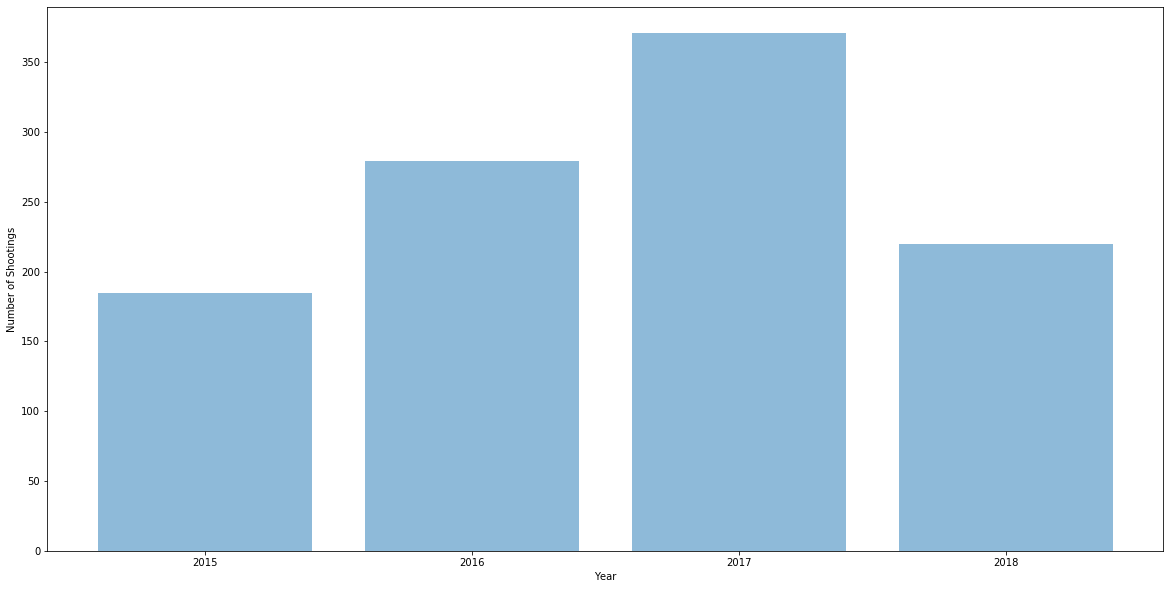

0

In [22]:
shoot_by_yr=df[df['SHOOTING']==1].groupby('YEAR').count().INCIDENT_NUMBER.reset_index(name='Number of Shootings')
shoot_by_yr
bar_chart(shoot_by_yr['Number of Shootings'],shoot_by_yr['YEAR'],'Year','Number of Shootings')

***Month wise Shootings over the years***

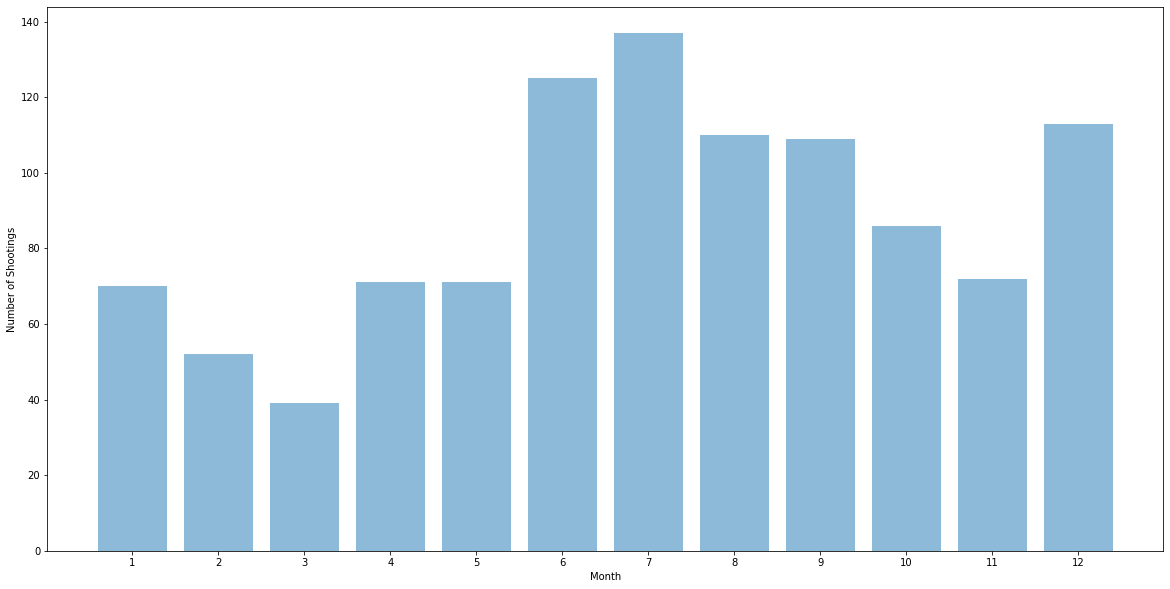

0

In [23]:
shoot_by_mnth=df[df['SHOOTING']==1].groupby('MONTH').count().INCIDENT_NUMBER.reset_index(name='Number of Shootings')
shoot_by_mnth

bar_chart(shoot_by_mnth['Number of Shootings'],shoot_by_mnth['MONTH'],'Month','Number of Shootings')

***Day wise Shooting occurences over the years***

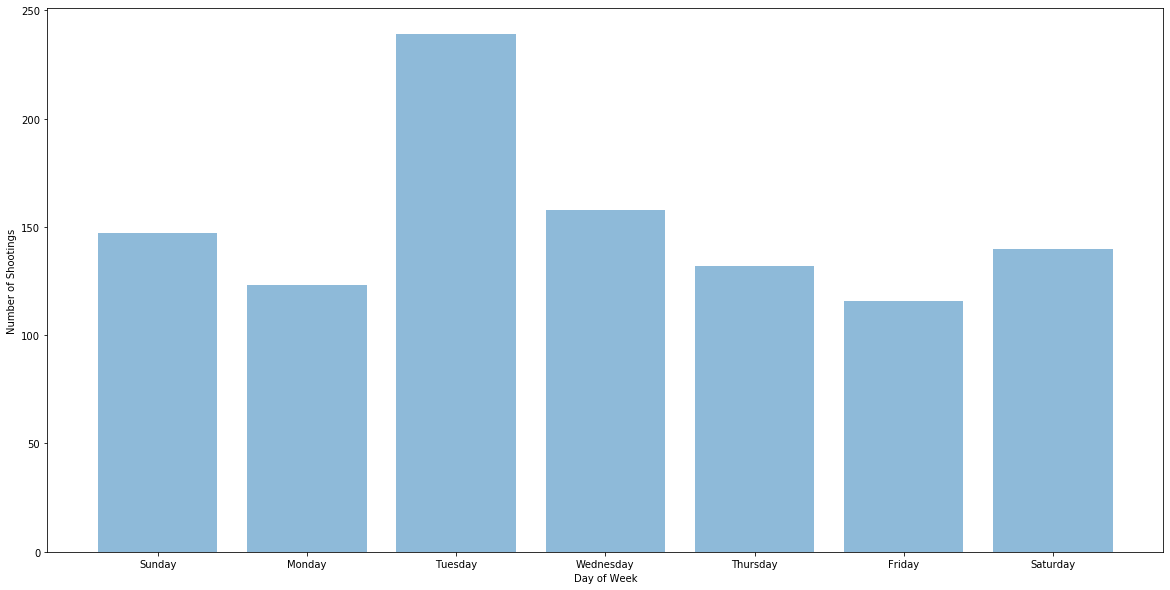

0

In [24]:
shoot_by_day=df[df['SHOOTING']==1].groupby('DAY_OF_WEEK').count().INCIDENT_NUMBER.reset_index(name='Number of Shootings')
shoot_by_day

bar_chart(shoot_by_day['Number of Shootings'],day_of_week,'Day of Week','Number of Shootings')

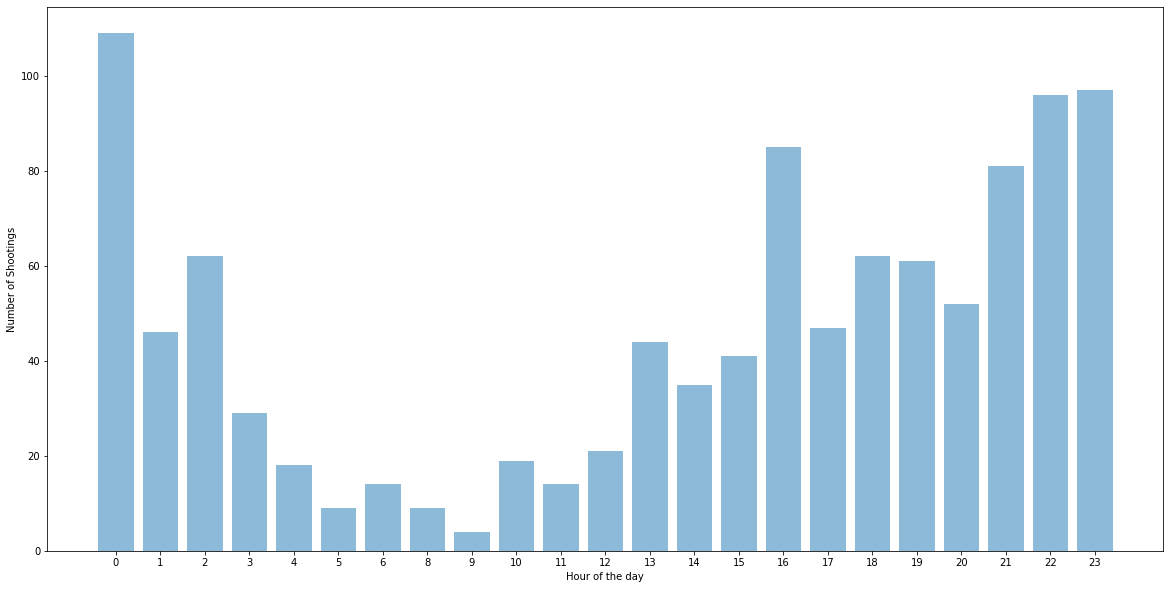

0

In [25]:
shoot_by_hour=df[df['SHOOTING']==1].groupby('HOUR').count().INCIDENT_NUMBER.reset_index(name='Number of Shootings')
shoot_by_hour

bar_chart(shoot_by_hour['Number of Shootings'],shoot_by_hour['HOUR'],'Hour of the day','Number of Shootings')

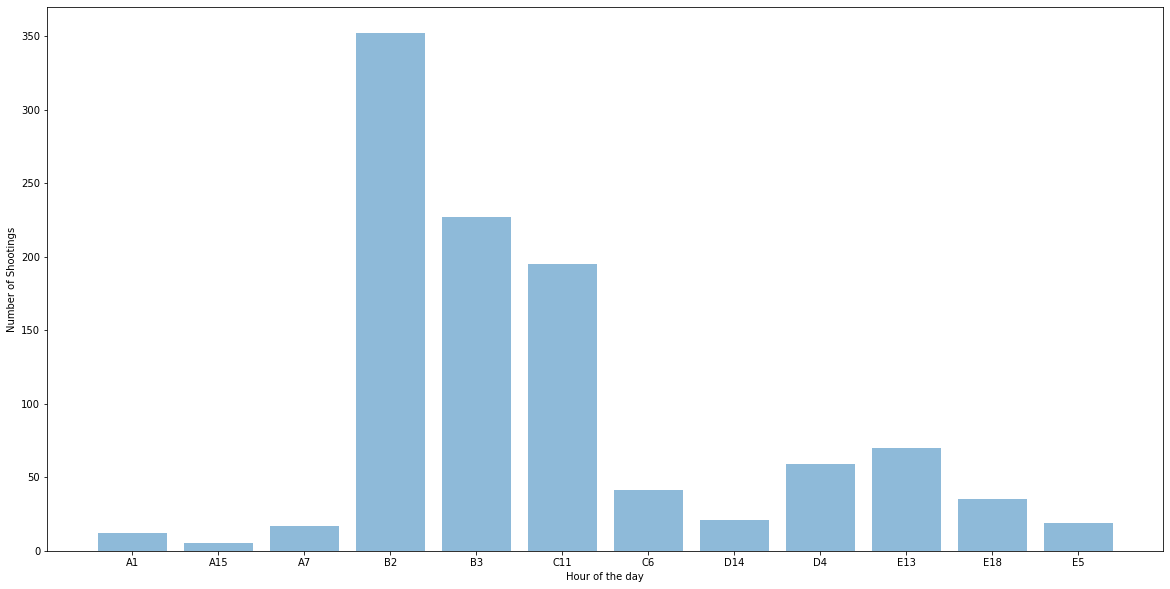

0

In [26]:
shoot_by_district=df[df['SHOOTING']==1].groupby('DISTRICT').count().INCIDENT_NUMBER.reset_index(name='Number of Shootings')
shoot_by_district

bar_chart(shoot_by_district['Number of Shootings'],shoot_by_district['DISTRICT'],'Hour of the day','Number of Shootings')

***District wise Shooting occurences over the years - Each district is highlighted in a different color using cm.spectral option!
Two different ways to achieve the same output is also shown here***

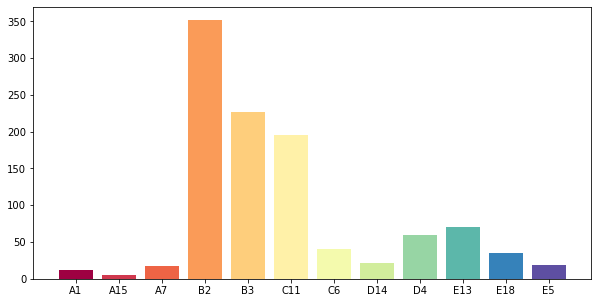

In [27]:
plt.figure(figsize=[10,5])
color_dis=plt.cm.Spectral(np.linspace(0, 1, len(shoot_by_district['DISTRICT'])))
plt.bar(shoot_by_district['DISTRICT'],shoot_by_district['Number of Shootings'], color=color_dis)
plt.show()

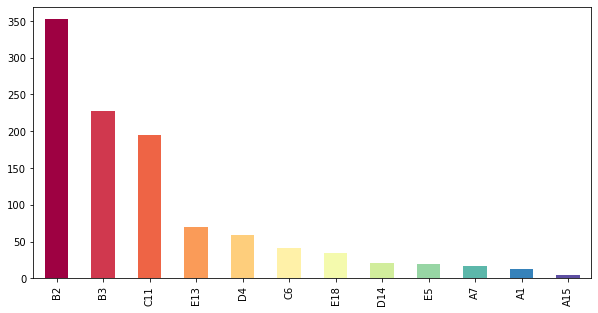

In [28]:
plt.figure(figsize=(10,5))
df_shoot=df[df['SHOOTING']==1]
df_shoot['DISTRICT'].value_counts().plot.bar(color=color_dis)
plt.show()

***Plotting Latitude and Longitudes of shooting crime locations in different kinds of joint plots to see if there is a pattern or concentration of crimes pertaining to a specific location***

***P.S. joinplot option in seaborn library creates its own figure and axes. Hence it does not have an 'ax' argument to allow us to add subplots***

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


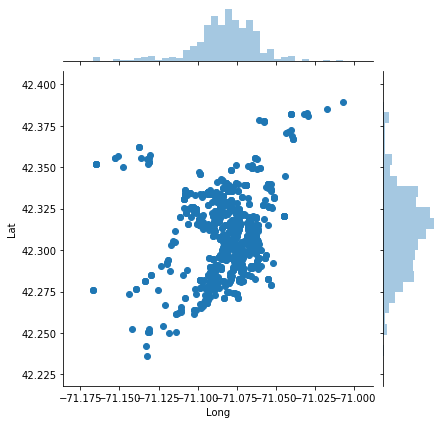

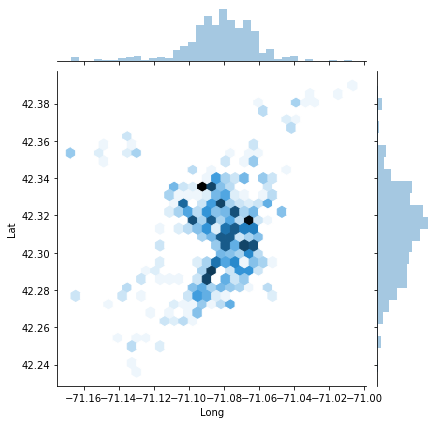

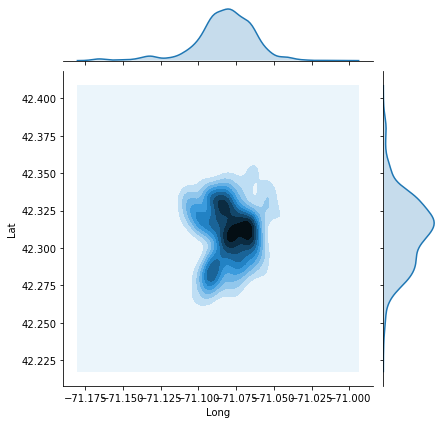

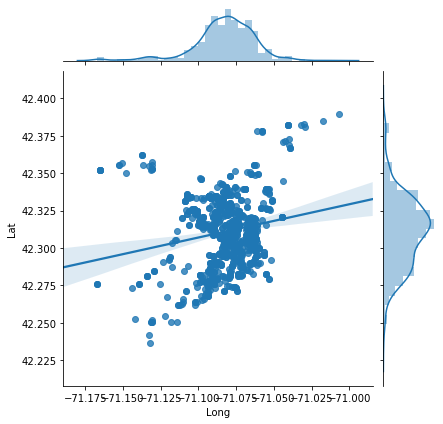

In [29]:
shoot_location = df_shoot[['Lat','Long']]
shoot_location = shoot_location.dropna()

shoot_location.head()
shoot_location=shoot_location.loc[(shoot_location['Lat']>40) & (shoot_location['Long'] < -60)]  

x_shoot = shoot_location['Long']
y_shoot = shoot_location['Lat']

sns.jointplot(x_shoot, y_shoot, kind='scatter')
sns.jointplot(x_shoot, y_shoot, kind='hex')
sns.jointplot(x_shoot, y_shoot, kind='kde')
sns.jointplot(x_shoot,y_shoot,kind='reg')
plt.show()

***Plot UCR Part wise Shootings over the years***

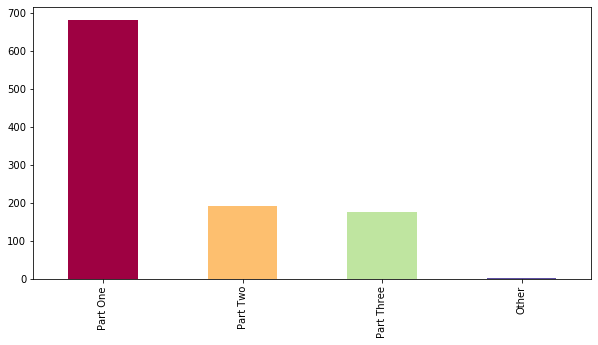

In [30]:
shoot_by_UCR=df[df['SHOOTING']==1].groupby('UCR_PART').count().INCIDENT_NUMBER.reset_index(name='Number of Shootings')

plt.figure(figsize=(10,5))
color_ucr=plt.cm.Spectral(np.linspace(0, 1, len(shoot_by_UCR['UCR_PART'])))
df_shoot['UCR_PART'].value_counts().plot.bar(color=color_ucr)
plt.show()

***Exploring all the crime locations based on longitude and Latitude data and see if it is concentrated somewhere or if there is a pattern visible***

In [31]:
df[['Lat','Long']].describe()

location = df[['Lat','Long']]
location = location.dropna()

location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]

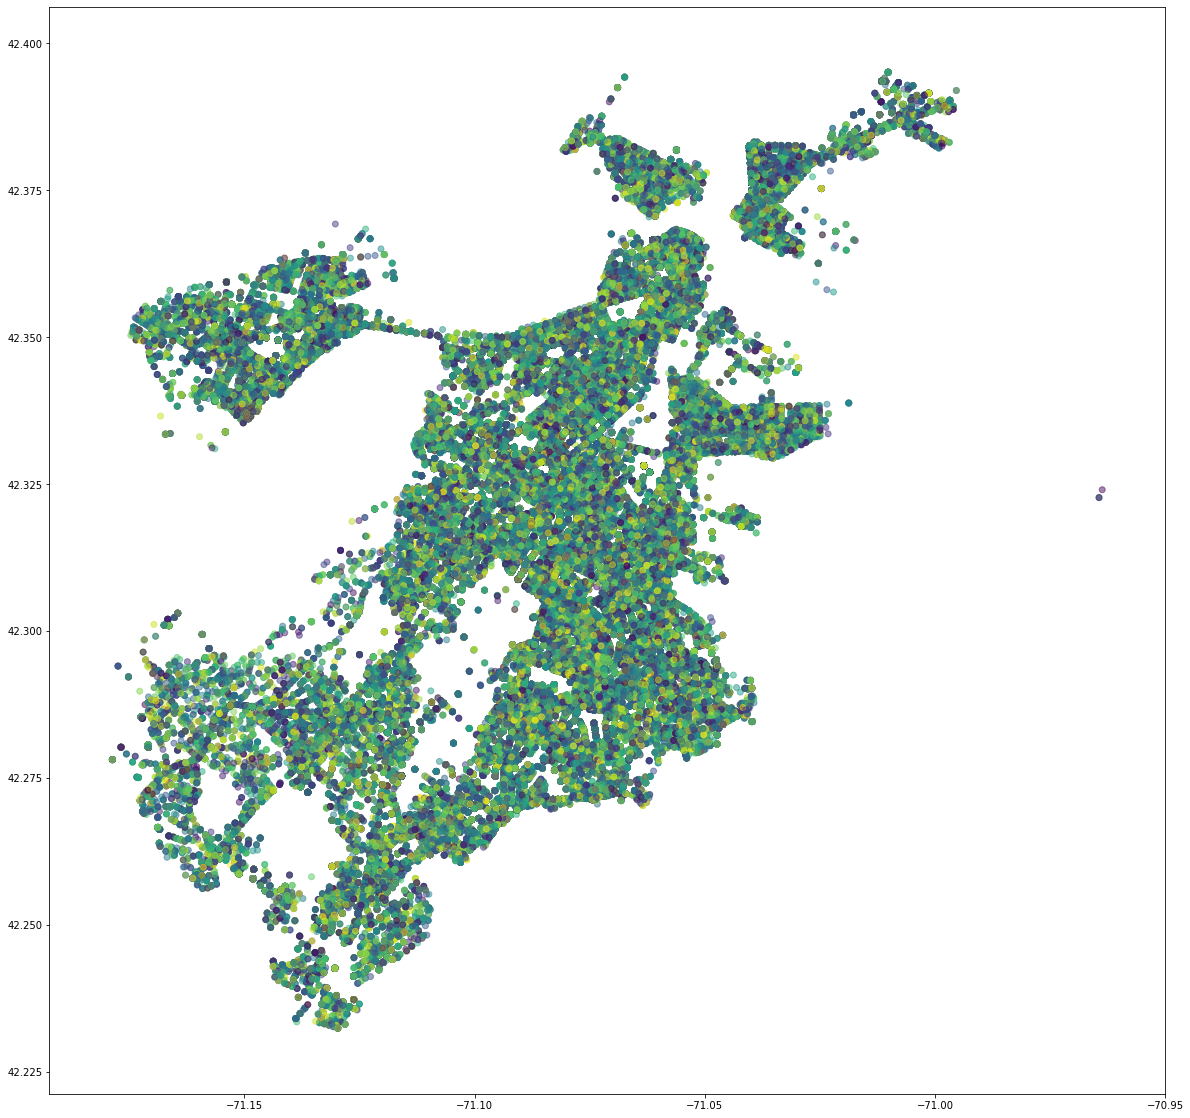

In [32]:
x = location['Long']
y = location['Lat']
rand_colors = np.random.rand(len(x))
plt.figure(figsize=(20,20))
plt.scatter(x, y,c=rand_colors, alpha=0.5)
plt.show()

In [33]:
m = folium.Map([42.348624, -71.062492], zoom_start=11)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


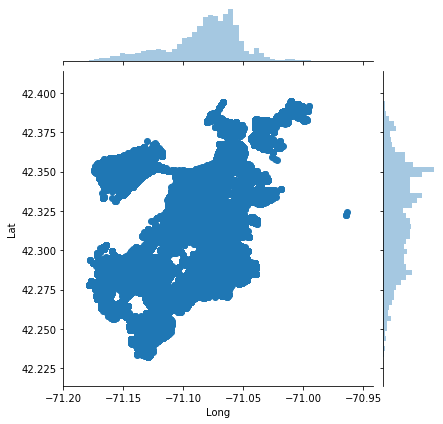

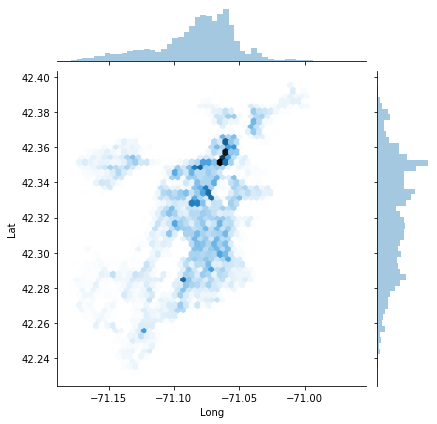

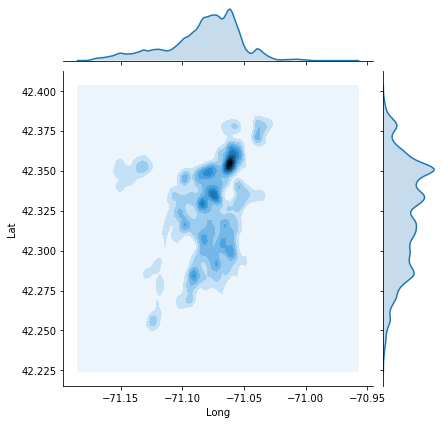

In [34]:
#generate various join plots to see if there is a pattern or trend
sns.jointplot(x, y, kind='scatter')
sns.jointplot(x, y, kind='hex')
sns.jointplot(x, y, kind='kde')

In [35]:
df.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1774
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  93
STREET                 10977
Lat                    20632
Long                   20632
Location                   0
dtype: int64

***Create a new category in the dataframe to indicate if the crime happened during Day or Night***

***Link to determine Day or Night based on Hour in Boston - https://www.timeanddate.com/sun/usa/boston ***

***We take the details on Day time for each of the 12 months from the above mentioned website and use the same to tag the said hours as Day***

***Then we Night using the logic that whenever Day==0, Night = 1***

In [36]:
df['Day']=0
df['Night']=0
# Day time for 1st month
df['Day'].loc[(df['MONTH'] == 1) & (df['HOUR'] >= 6) & (df['HOUR'] <= 18)] = 1

# Day time for 2st month
df['Day'].loc[(df['MONTH'] == 2) & (df['HOUR'] >= 6) & (df['HOUR'] <= 19)] = 1

# Day time for 3rd month
df['Day'].loc[(df['MONTH'] == 3) & (df['HOUR'] >= 6) & (df['HOUR'] <= 20)] = 1

# Day time for 4st month
df['Day'].loc[(df['MONTH'] == 4) & (df['HOUR'] >= 5) & (df['HOUR'] <= 20)] = 1

# Day time for 5th month
df['Day'].loc[(df['MONTH'] == 5) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Day time for 6th month
df['Day'].loc[(df['MONTH'] == 6) & (df['HOUR'] >= 4) & (df['HOUR'] <= 21)] = 1

# Day time for 7th month
df['Day'].loc[(df['MONTH'] == 7) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Day time for 8th month
df['Day'].loc[(df['MONTH'] == 8) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Day time for 9th month
df['Day'].loc[(df['MONTH'] == 9) & (df['HOUR'] >= 6) & (df['HOUR'] <= 20)] = 1

# Day time for 10th month
df['Day'].loc[(df['MONTH'] == 10) & (df['HOUR'] >= 6) & (df['HOUR'] <= 19)] = 1

# Day time for 11th month
df['Day'].loc[(df['MONTH'] == 11) & (df['HOUR'] >= 6) & (df['HOUR'] <= 17)] = 1

# Day time for 12th month
df['Day'].loc[(df['MONTH'] == 12) & (df['HOUR'] >= 7) & (df['HOUR'] <= 17)] = 1


#Update Night as 1 where Day is 0
df['Night'].loc[df['Day']==0]=1

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


***Crime count on Day & Night***

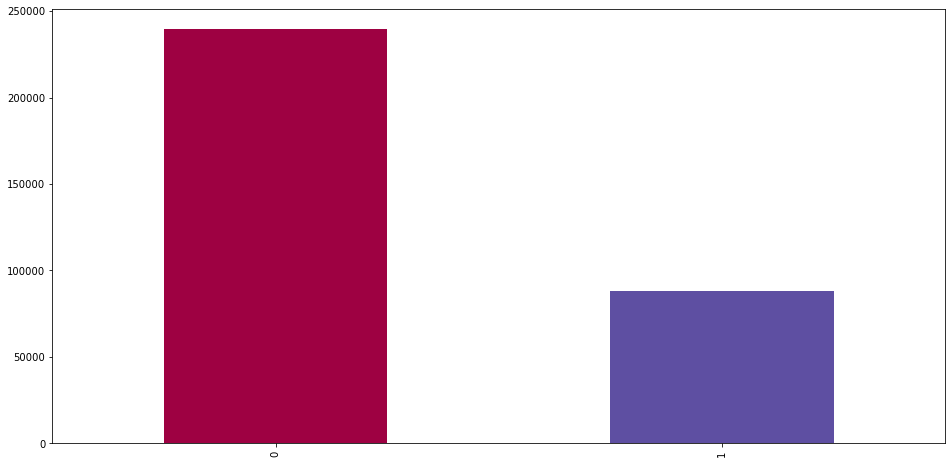

In [37]:
plt.figure(figsize=(16,8))
color_DN=plt.cm.Spectral(np.linspace(0, 1, 2))
df['Night'].value_counts().plot.bar(color=color_DN)
plt.show()

***Try to see if we can classify the Offense code group by considering other columns independent variables' behaviour/ pattern***

***Y - OFFENSE_CODE_GROUP;X - 'DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK', 'HOUR','Lat','Long', 'OFFENSE_CODE_GROUP','Day','Night'***

***Top Offense code groups***

In [38]:
df['OFFENSE_CODE_GROUP'].value_counts().head(15)

Motor Vehicle Accident Response    38134
Larceny                            26670
Medical Assistance                 24226
Investigate Person                 19176
Other                              18612
Drug Violation                     17037
Simple Assault                     16263
Vandalism                          15810
Verbal Disputes                    13478
Towed                              11632
Investigate Property               11443
Larceny From Motor Vehicle         11120
Property Lost                      10077
Warrant Arrests                     8579
Aggravated Assault                  8033
Name: OFFENSE_CODE_GROUP, dtype: int64

***Place the top offense code groups in a list***

In [39]:
list_offense_code_group=('Motor Vehicle Accident Response',
                           'Larceny',
                           'Medical Assistance',
                           'Investigate Person',
                           'Other',
                           'Drug Violation',
                           'Simple Assault',
                           'Vandalism',
                           'Verbal Disputes',
                           'Towed',
                           'Investigate Property',
                           'Larceny From Motor Vehicle')
list_offense_code_group

('Motor Vehicle Accident Response',
 'Larceny',
 'Medical Assistance',
 'Investigate Person',
 'Other',
 'Drug Violation',
 'Simple Assault',
 'Vandalism',
 'Verbal Disputes',
 'Towed',
 'Investigate Property',
 'Larceny From Motor Vehicle')

***We are going to consider only top 15 offenses data for our model to minimize the noise***

In [40]:
df_model = pd.DataFrame()

In [41]:
i = 0

while i < len(list_offense_code_group):

    df_model = df_model.append(df.loc[df['OFFENSE_CODE_GROUP'] == list_offense_code_group[i]])
    
    i+=1

In [42]:
df_model.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location', 'Day', 'Night'],
      dtype='object')

***List only the needed columns and remove the rest***

In [43]:
list_column = ['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK',
               'HOUR','Lat','Long', 'OFFENSE_CODE_GROUP','Day','Night']

In [44]:
df_model=df_model[list_column]

***We are going to convert the available column values into numbers***

***DISTRICT Values are being assigned numbers - Each district will be identified by a number***

In [45]:
df_model['DISTRICT'].unique()

array([nan, 'D14', 'C6', 'C11', 'B2', 'E18', 'A1', 'A7', 'B3', 'E13',
       'D4', 'E5', 'A15'], dtype=object)

In [46]:
df_model['DISTRICT'] = df_model['DISTRICT'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12
})

df_model['DISTRICT'].unique()

array([nan,  6.,  5.,  8.,  3.,  2., 11., 10.,  1.,  7.,  9.,  4., 12.])

***Assign numbers to REPORTING_AREA column values or convert the string values to numerics***

In [47]:
df_model['REPORTING_AREA'] = pd.to_numeric(df_model['REPORTING_AREA'], errors='coerce')

***As MONTH column values are already numbers we dont have to alter them***

In [48]:
df_model['MONTH'].unique()

array([10,  9,  8,  5,  7,  6,  3,  4, 11, 12,  1,  2])

***Assign Day number to DAY_OF_WEEK Column values with the week starting from Monday i.e. Monday is assigned the value 1 and so on ***

In [49]:
df_model['DAY_OF_WEEK'] = df_model['DAY_OF_WEEK'].map({
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6, 
    'Sunday':7    
})

df_model['DAY_OF_WEEK'].unique()

array([3, 2, 1, 7, 4, 5, 6])

***As HOUR column values are already numbers we dont have to alter them***

In [50]:
df_model['HOUR'].unique()

array([20, 19, 15, 16, 14,  9, 17, 11, 22,  8,  7,  0, 23, 21, 10, 18, 12,
        2,  6, 13,  5,  4,  3,  1])

***LAT and LONG values are also in the expected format already***

In [51]:
df_model[['Lat', 'Long']].head()

,Lat,Long
6,42.320734,-71.056764
10,42.344323,-71.157784
15,42.315961,-71.090426
20,42.330015,-71.038513
68,42.310910,-71.057674


***Fill nan in our model with 0***

In [52]:
df_model.fillna(0, inplace = True)

***Define our independent variable/s --> X***

In [53]:
x = df_model[['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK','HOUR','Lat','Long','Day','Night']]

***Define our dependent variable--> Y***

In [54]:
y = df_model['OFFENSE_CODE_GROUP']

***Check our dependent variable and assign unique numbers to each category or group***

In [55]:
y.unique()

array(['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance',
       'Investigate Person', 'Other', 'Drug Violation', 'Simple Assault',
       'Vandalism', 'Verbal Disputes', 'Towed', 'Investigate Property',
       'Larceny From Motor Vehicle'], dtype=object)

In [56]:
y=y.map({
    'Motor Vehicle Accident Response':1, 
    'Larceny':2, 
    'Medical Assistance':3,
    'Investigate Person':4, 
    'Other':5, 
    'Drug Violation':6, 
    'Simple Assault':7,
    'Vandalism':8, 
    'Verbal Disputes':9, 
    'Towed':10, 
    'Investigate Property':11,
    'Larceny From Motor Vehicle':12
})

***Import sklearn libraries***

In [57]:
from sklearn.model_selection import train_test_split

***Generate test and train datasets using train_test_split module of sklearn library***

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(201240, 9) (201240,)
(22361, 9) (22361,)


***Import Classification modules from sklearn***

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
!conda install -c conda-forge lightgbm --yes
from lightgbm import LGBMClassifier

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    lightgbm-2.2.3             |   py36hf484d3e_0        1002 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

    lightgbm: 2.2.3-py36hf484d3e_0 conda-forge

The following packages will be UPDATED:

    certifi:  2019.6.16-py36_1     conda-forge --> 2019.9.11-py36_0 conda-forge


certifi-2019.9.11 

***If lightgbm is not installed use the following command to get it installed - !conda install -c conda-forge lightgbm --yes***

***Import f1-score metric***

In [60]:
from sklearn.metrics import f1_score

***Define function to get mean, max and min that will be used to analyze the f1 score of different classifier algorithms***

In [61]:
def func_results(result):
    print('mean: ' + str(result.mean()))
    print('max: ' + str(result.max()))
    print('min: ' + str(result.min()))
    return result

***Decision tree classifier function to train, predict and compare with actual values***

In [62]:
def func_DecisionTreeClassifier(x_train, y_train):
    dec_tree = DecisionTreeClassifier()
    dec_tree = dec_tree.fit(x_train, y_train)

    dec_tree_pred = dec_tree.predict(x_test)

    dec_tree_score = f1_score(y_test, dec_tree_pred, average=None)
    return func_results(dec_tree_score)

In [63]:
func_DecisionTreeClassifier(x_train,y_train)

mean: 0.19806476055292177
max: 0.4843835616438356
min: 0.08486383787207093


array([0.30808351, 0.30484647, 0.17844486, 0.12561385, 0.14543605,
       0.48438356, 0.11791093, 0.08486384, 0.13516524, 0.24934612,
       0.1459385 , 0.09674419])

***Bernoulli classfier function to train, predict and compare with actual values***

In [64]:
def func_BernoulliNB(x_train, y_train):
    bernoulli = BernoulliNB()
    bernoulli = bernoulli.fit(x_train, y_train)

    bernoulli_pred = bernoulli.predict(x_test)

    bernoulli_score = f1_score(y_test, bernoulli_pred, average=None)
    return func_results(bernoulli_score)

In [65]:
func_BernoulliNB(x_train,y_train)

mean: 0.05805414462047637
max: 0.24885300055055973
min: 0.0


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.248853  , 0.22550832, 0.17029817, 0.        , 0.        ,
       0.        , 0.        , 0.05199025, 0.        , 0.        ,
       0.        , 0.        ])

***Extra tree classifier function to train, predict and compare with actual values***

In [66]:
def func_ext_tree_cls(x_train,y_train):
    ext_tree=ExtraTreeClassifier()
    ext_tree=ext_tree.fit(x_train,y_train)
    ext_tree_pred=ext_tree.predict(x_test)
    ext_tree_score=f1_score(y_test,ext_tree_pred,average=None)
    return func_results(ext_tree_score)

In [67]:
func_ext_tree_cls(x_train,y_train)

mean: 0.1817138950617958
max: 0.45857104047813096
min: 0.07996192289386006


array([0.27760675, 0.27986602, 0.15719064, 0.10409114, 0.14025316,
       0.45857104, 0.10272873, 0.08905613, 0.12490594, 0.23057216,
       0.1357631 , 0.07996192])

***K Neighbor classifier function to train, predict and compare with actual values***

***For KNN Classifier K value needs to be passed, if not, default value - 5 is taken as K value***

***Here we are passing the n value as 5 and the f1 score is shown below***

In [68]:
def func_KNeighborsClassifier(x_train, y_train,n):
    Kneigh = KNeighborsClassifier(n_neighbors=n)
    Kneigh.fit(x_train, y_train) 

    Kneigh_pred = Kneigh.predict(x_test)

    Kneigh_score = f1_score(y_test, Kneigh_pred, average=None)
    return func_results(Kneigh_score),Kneigh_pred


In [69]:
KNN_score, KNN_pred=func_KNeighborsClassifier(x_train,y_train,5)
KNN_score

mean: 0.18173076788330436
max: 0.37878787878787873
min: 0.0646864686468647


array([0.31666516, 0.31042617, 0.17331996, 0.11317311, 0.11513054,
       0.37878788, 0.09543065, 0.07900208, 0.11349419, 0.26959561,
       0.1510574 , 0.06468647])

In [70]:
from sklearn import metrics

***Now let us see, if the score changes with the K value but here we are considering Accuracy metric instead of f1 score and calculate the score dynamically for each K value and we can see the same in a graph to choose the K value that gives us a better score***

***May be we can try using the K value with highest accuracy score above and see if f1 score improves as well***

In [71]:
Ks=20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.2005277 , 0.21278118, 0.21913152, 0.22306695, 0.22351415,
       0.22449801, 0.22445329, 0.22543715, 0.22682349, 0.22700237,
       0.22812039, 0.2285676 , 0.22919369, 0.23035642, 0.23295023,
       0.23125084, 0.23210053, 0.23183221, 0.23254774])

In [72]:
mean_acc - 1 * std_acc

array([0.19785012, 0.21004422, 0.21636525, 0.22028298, 0.2207282 ,
       0.2217077 , 0.22166318, 0.2226427 , 0.22402297, 0.22420108,
       0.22531424, 0.22575951, 0.2263829 , 0.22754064, 0.23012341,
       0.22843123, 0.22927731, 0.22901013, 0.22972262])

In [73]:
mean_acc + 1 * std_acc

array([0.20320529, 0.21551814, 0.2218978 , 0.22585091, 0.22630011,
       0.22728832, 0.2272434 , 0.22823159, 0.229624  , 0.22980366,
       0.23092654, 0.23137568, 0.23200448, 0.23317221, 0.23577704,
       0.23407044, 0.23492375, 0.23465429, 0.23537285])

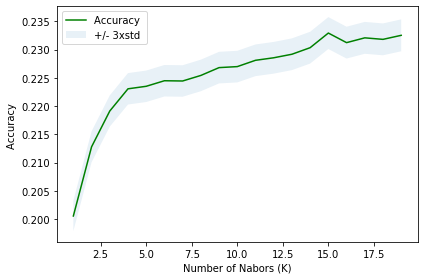

In [74]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [75]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.23295022583963151 with k= 15


***Gaussian classifier function to train, predict and compare with actual values***

In [76]:
def func_GaussianNB(x_train, y_train):
    gaussian = GaussianNB()
    gaussian = gaussian.fit(x_train, y_train)

    gaussian_pred = gaussian.predict(x_test)

    gaussian_score = f1_score(y_test, gaussian_pred, average=None)
    return func_results(gaussian_score)


In [77]:
func_GaussianNB(x_train,y_train)

mean: 0.06174238363937672
max: 0.2544691718350967
min: 0.0


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.23436323, 0.25446917, 0.00412541, 0.        , 0.        ,
       0.        , 0.        , 0.08561313, 0.16233766, 0.        ,
       0.        , 0.        ])

***Random Forest classifier function to train, predict and compare with actual values***

In [78]:
def func_RandomForestClassifier(x_train, y_train):
    rfc = RandomForestClassifier()
    rfc = rfc.fit(x_train, y_train)

    rfc_pred = rfc.predict(x_test)

    rfc_score = f1_score(y_test, rfc_pred, average=None)
    return func_results(rfc_score)

In [79]:
func_RandomForestClassifier(x_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean: 0.21465848447005068
max: 0.5184554230550823
min: 0.08610709117221418


array([0.34674518, 0.34214729, 0.18562401, 0.12671421, 0.13564052,
       0.51845542, 0.11929107, 0.08610709, 0.14109207, 0.31090909,
       0.16987179, 0.09330406])

***LGBM classifier function to train, predict and compare with actual values***

In [80]:
def func_LGBMClassifier(x_train, y_train):
    lgbm = LGBMClassifier()
    lgbm = lgbm.fit(x_train, y_train)

    lgbm_pred = lgbm.predict(x_test)

    lgbm_score = f1_score(y_test, lgbm_pred, average=None)
    return func_results(lgbm_score)

In [81]:
func_LGBMClassifier(x_train,y_train)

mean: 0.19767009358877552
max: 0.3897681854516387
min: 0.01439712057588482


array([0.34541493, 0.38976819, 0.17340191, 0.06470839, 0.08251121,
       0.35800971, 0.0993542 , 0.01439712, 0.1816828 , 0.37239029,
       0.20317003, 0.08723236])

***Create another model to see how well we can classify the data ***

***Y- DISTRICT

X - OFFENSE_CODE_GROUP, Month, Day of week, Hour, Day, Night***

***Create a Dataframe for 2nd model with the following columns***

In [82]:
df_model_2 = df[['OFFENSE_CODE', 'DISTRICT','MONTH','DAY_OF_WEEK','HOUR','Day','Night']]
df_model_2.head()

,OFFENSE_CODE,DISTRICT,MONTH,DAY_OF_WEEK,HOUR,Day,Night
0,2403,E18,10,Wednesday,20,0,1
1,3201,D14,8,Thursday,20,1,0
2,2647,B2,10,Wednesday,19,1,0
3,413,A1,10,Wednesday,20,0,1
4,3122,A7,10,Wednesday,20,0,1


***Convert all the variables to the desired number format as we did before***

In [83]:
df_model_2['OFFENSE_CODE'] = pd.to_numeric(df_model_2['OFFENSE_CODE'], errors='coerce')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


***DISTRICT value is mapped to numbers like we did in the previous model***

In [84]:
df_model_2['DISTRICT'] = df_model_2['DISTRICT'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12
})

df_model_2['DISTRICT'].unique()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


array([ 2.,  6.,  3., 11., 10.,  8., nan,  9.,  7.,  1.,  5., 12.,  4.])

***Assign numbers to DAY_OF_WEEK column values with the week starting from Monday***

In [85]:
df_model_2['DAY_OF_WEEK'] = df_model_2['DAY_OF_WEEK'].map({
    'Tuesday':2, 
    'Saturday':6, 
    'Monday':1, 
    'Sunday':7, 
    'Thursday':4, 
    'Wednesday':3,
    'Friday':5
})

df_model_2['DAY_OF_WEEK'].unique()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([3, 4, 2, 1, 6, 7, 5])

***Check if there is any null value in our dataframe***

In [86]:
df_model_2.isnull().sum()

OFFENSE_CODE       0
DISTRICT        1774
MONTH              0
DAY_OF_WEEK        0
HOUR               0
Day                0
Night              0
dtype: int64

***Drop na and nan values from our dataframe***

In [87]:
df_model_2 = df_model_2.dropna()

***After dropping we could see that there is no null value in our data frame***

In [88]:
df_model_2.isnull().sum()

OFFENSE_CODE    0
DISTRICT        0
MONTH           0
DAY_OF_WEEK     0
HOUR            0
Day             0
Night           0
dtype: int64

In [89]:
df_model_2.shape

(326046, 7)

***Declare our dependent and independent variables***

In [90]:
x = df_model_2[['OFFENSE_CODE','MONTH','DAY_OF_WEEK','HOUR','Day','Night']]
y = df_model_2['DISTRICT']

***Split our data into train and test sets***

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(293441, 6) (293441,)
(32605, 6) (32605,)


***Start applying the classifiers***

***Applying BernoulliNB classifier and the mean, max, min of the f1 scores along with actual f1 scores array is returned***

In [92]:
func_BernoulliNB(x_train,y_train)

mean: 0.029193253496147903
max: 0.27446228415631624
min: 0.0


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.        , 0.        , 0.27446228, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07585676, 0.        ])

***Applying Decision Tree classifier and the mean, max, min of the f1 scores along with actual f1 scores array is returned***

In [93]:
func_DecisionTreeClassifier(x_train,y_train)

mean: 0.11335458377968738
max: 0.21258419582717267
min: 0.011402508551881414


array([0.18743109, 0.09070064, 0.2125842 , 0.05858748, 0.09812667,
       0.08588268, 0.05719921, 0.15193237, 0.20190896, 0.03423237,
       0.17026684, 0.01140251])

***Applying External Tree classifier and the mean, max, min of the f1 scores along with actual f1 scores array is returned***

In [94]:
func_ext_tree_cls(x_train,y_train)

mean: 0.1127790155506534
max: 0.21193028393748467
min: 0.01639344262295082


array([0.1909867 , 0.09014515, 0.21193028, 0.0553328 , 0.09674543,
       0.08394366, 0.06675479, 0.14966151, 0.19848448, 0.02956705,
       0.16340289, 0.01639344])

***Applying GaussianNB classifier and the mean, max, min of the f1 scores along with actual f1 scores array is returned***

In [95]:
func_GaussianNB(x_train,y_train)

mean: 0.05671163456222778
max: 0.2624587528555715
min: 0.0


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.        , 0.        , 0.26245875, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.23499748, 0.        ,
       0.18308338, 0.        ])

***Applying KNN classifier and the mean, max, min of the f1 scores along with actual f1 scores array is returned***

In [96]:
func_KNeighborsClassifier(x_train,y_train,5)

mean: 0.10796506324051282
max: 0.2128002579397066
min: 0.007653061224489796


(array([0.19255863, 0.08250825, 0.21280026, 0.04460303, 0.0862069 ,
        0.08146766, 0.04778157, 0.14998135, 0.19602063, 0.02480271,
        0.16919671, 0.00765306]), array([6., 1., 2., ..., 3., 1., 3.]))

***As we did before we are trying KNN Classifier with different K values but the accuracy score used below is not a great representation of accuracy for data sets where imbalanced class distribution exists like in this case***

In [97]:
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.13488729, 0.1332311 , 0.13905843, 0.14608189, 0.1523386 ,
       0.15617237, 0.16175433, 0.16199969, 0.1655881 ])

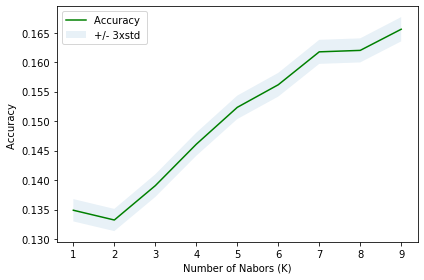

In [98]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

***Applying LGBM classifier and the mean, max, min of the f1 scores along with actual f1 scores array is returned***

In [99]:
func_LGBMClassifier(x_train,y_train)

mean: 0.10939254551439898
max: 0.2820928237872868
min: 0.002962962962962963


array([0.16477173, 0.00766284, 0.28142721, 0.02236198, 0.0501764 ,
       0.03815728, 0.00560224, 0.17945142, 0.28209282, 0.01025641,
       0.26778724, 0.00296296])

***Applying Random Forest classifier and the mean, max, min of the f1 scores along with actual f1 scores array is returned***

In [100]:
func_RandomForestClassifier(x_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean: 0.11550867698112925
max: 0.21460058058273307
min: 0.01948627103631532


array([0.16814854, 0.06449593, 0.20448608, 0.06361008, 0.08907981,
       0.0849764 , 0.06600864, 0.16672115, 0.21460058, 0.05267779,
       0.19181287, 0.01948627])

***Classifying UCR_PART variable***

***Y - UCR_PART***

***X - DISTRICT, REPORTING_AREA, MONTH, DAY_OF_WEEK, HOUR, LATITUDE, LONGITUDE***

***We first standardise and normalise our data like we did in our previous models***

In [101]:
df_model3 = df[['DISTRICT','REPORTING_AREA', 'MONTH','DAY_OF_WEEK','HOUR','UCR_PART','Lat','Long']]

In [102]:
df_model3['DISTRICT'] = df_model3['DISTRICT'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12
})

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [103]:
df_model3['REPORTING_AREA'] = pd.to_numeric(df_model3['REPORTING_AREA'], errors='coerce')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
df_model3['DAY_OF_WEEK'] = df_model3['DAY_OF_WEEK'].map({
    'Tuesday':2, 
    'Saturday':6, 
    'Monday':1, 
    'Sunday':7, 
    'Thursday':4, 
    'Wednesday':3,
    'Friday':5
})

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [105]:
df_model3['UCR_PART'].unique()

array(['Part Two', 'Part Three', 'Part One', nan, 'Other'], dtype=object)

In [106]:
df_model3['UCR_PART'] = df_model3['UCR_PART'].map({
    'Part Three':3, 
    'Part One':1, 
    'Part Two':2, 
#    'Other':4
})

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [107]:
df_model3 = df_model3.dropna()
print(df_model3.shape)
df_model3.isnull().sum()

(303064, 8)


DISTRICT          0
REPORTING_AREA    0
MONTH             0
DAY_OF_WEEK       0
HOUR              0
UCR_PART          0
Lat               0
Long              0
dtype: int64

***Define our x and y then split our data set into test and train sets***

In [108]:
x = df_model3[['DISTRICT','REPORTING_AREA', 'MONTH','DAY_OF_WEEK','HOUR','Lat','Long']]
y = df_model3['UCR_PART']

In [109]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size = 0.1,
    random_state=42
)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(272757, 7) (272757,)
(30307, 7) (30307,)


***Apply all the classifiers like we did before***

In [110]:
func_BernoulliNB(x_train,y_train)

mean: 0.22146609193114622
max: 0.6641835452802327
min: 0.0


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.00000000e+00, 2.14730513e-04, 6.64183545e-01])

In [111]:
func_DecisionTreeClassifier(x_train,y_train)

mean: 0.41865023410273516
max: 0.5482087881332214
min: 0.29720528857572637


array([0.29720529, 0.41053663, 0.54820879])

In [112]:
func_ext_tree_cls(x_train,y_train)

mean: 0.41129140901662975
max: 0.5429567642956765
min: 0.2893746496917287


array([0.28937465, 0.40154281, 0.54295676])

In [113]:
func_GaussianNB(x_train,y_train)

mean: 0.2214562781219341
max: 0.6641541038525963
min: 0.0


array([0.00000000e+00, 2.14730513e-04, 6.64154104e-01])

In [114]:
func_KNeighborsClassifier(x_train,y_train,5)

mean: 0.40316045868097544
max: 0.5431154145647832
min: 0.285172356919017


(array([0.28517236, 0.3811936 , 0.54311541]),
 array([3., 1., 3., ..., 3., 3., 3.]))

In [115]:
func_LGBMClassifier(x_train,y_train)

mean: 0.3371774211646212
max: 0.6667926757235676
min: 0.17225731826674975


array([0.17248227, 0.17225732, 0.66679268])

In [116]:
func_RandomForestClassifier(x_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean: 0.43148494330142073
max: 0.5987560294490987
min: 0.29797090706939683


array([0.29797091, 0.39772789, 0.59875603])

***Trying to cluster the locations of the crime***

In [117]:
location.isnull().sum()

Lat     0
Long    0
dtype: int64

In [118]:
location.shape

(306413, 2)

***Plot our location attributes as a scatter plot***

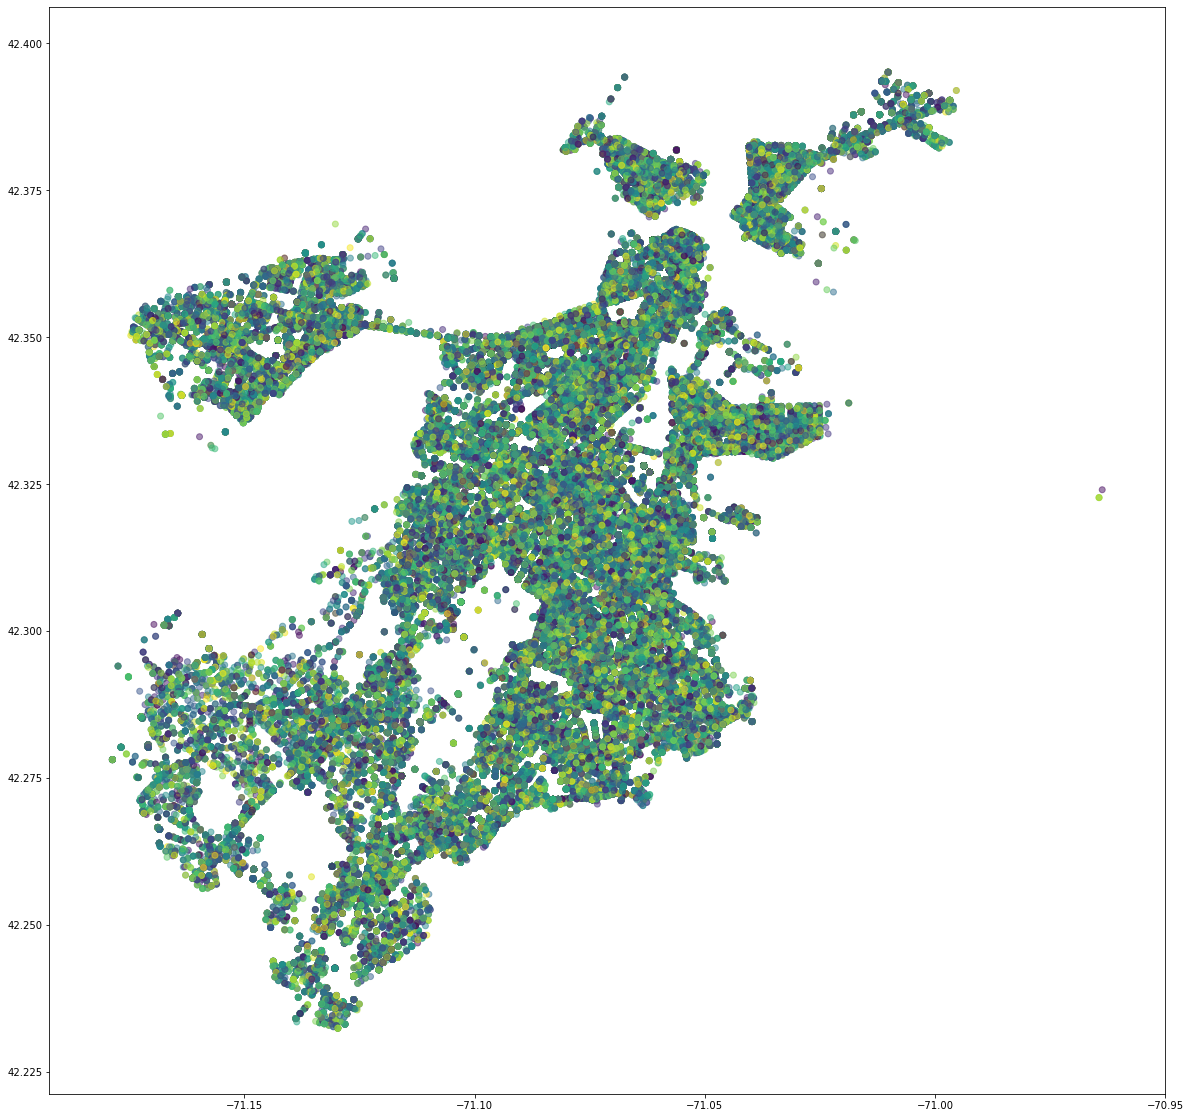

In [119]:
x = location['Long']
y = location['Lat']

colors = np.random.rand(len(location))

plt.figure(figsize=(20,20))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

***Set up our X variable on which clusters are to be determined***

In [120]:
X = location
X = X[~np.isnan(X)]

***Import KMeans clustering module from sklearn library***

In [121]:
from sklearn.cluster import KMeans

***Define K means fit and predict function that takes X and number of clusters as input***

In [122]:
def Kmeanscl(X, nclust):
    kmeansmodel = KMeans(nclust)
    kmeansmodel.fit(X)
    clust_labels = kmeansmodel.predict(X)
    cent = kmeansmodel.cluster_centers_
    return (clust_labels, cent)

***Call our K means model by setting the number of clusters as 2 and add the kmeans predicted cluster value as kmeans column in our X***

In [123]:
clust_labels, cent = Kmeanscl(X, 2)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

***Plot the clusters***

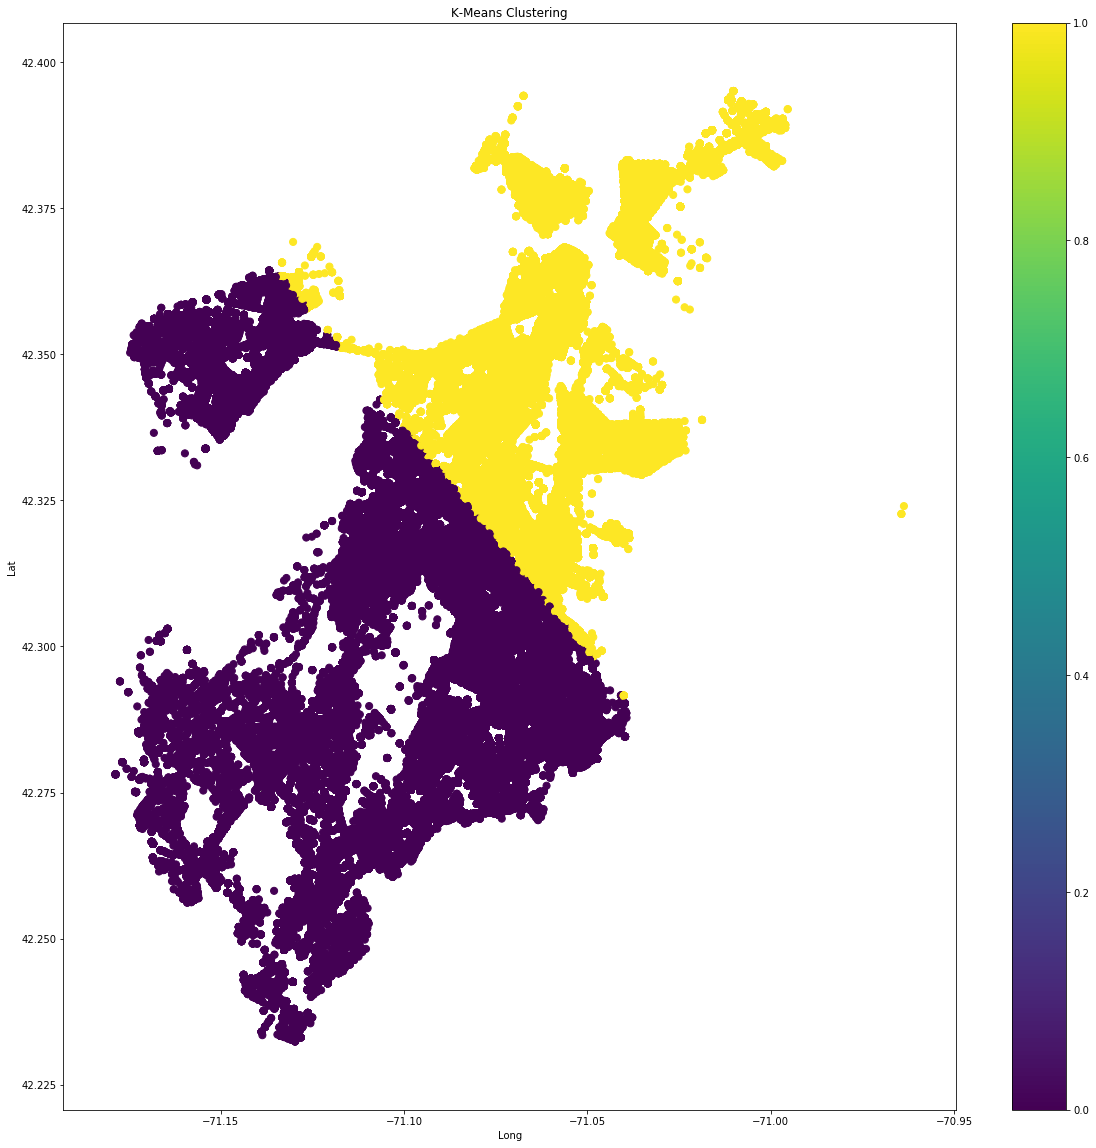

In [124]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

***Now we try the same thing with 3 clusters***

In [125]:
X = location
X = X[~np.isnan(X)]

In [126]:
clust_labels, cent = Kmeanscl(X, 3)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

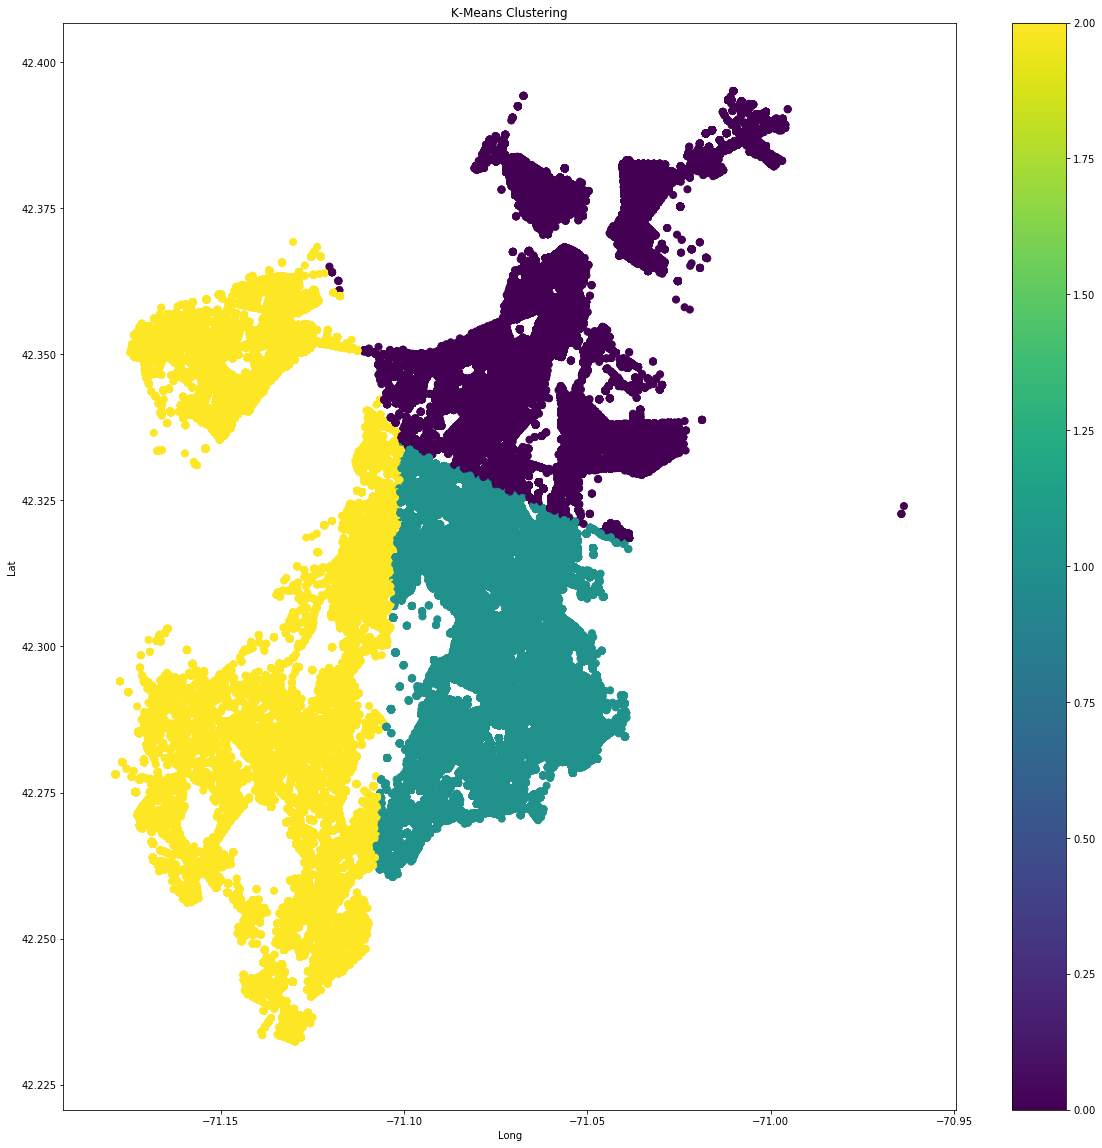

In [127]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

In [129]:
!conda install -c districtdatalabs yellowbrick --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-2.2.2           |   py36hb69df0a_2         6.6 MB
    pytest-5.0.1               |           py36_0         353 KB
    packaging-19.1             |           py36_0          46 KB
    yellowbrick-1.0            |           py36_0         429 KB  districtdatalabs
    more-itertools-7.2.0       |           py36_0          99 KB
    pyqt-5.6.0                 |   py36h22d08a2_6         5.4 MB
    importlib_metadata-0.19    |           py36_0          40 KB
    sip-4.18.1                 |   py36hf484d3e

***Install yellowbrick library to visualise KElbow to choose the best k value***

In [130]:
from yellowbrick.cluster import KElbowVisualizer

In [136]:
X = location
X = X[~np.isnan(X)]

***Apply KMeans and predict the best k value***

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


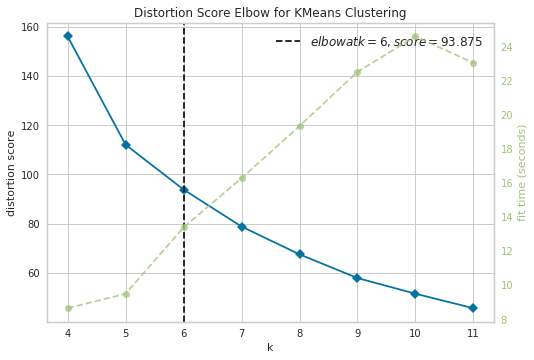

In [137]:
KMdl=KMeans()
visualizer = KElbowVisualizer(KMdl, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()  

***Difference here is that the timings curve is set as False so that is not plotted here and the metric to calculate the score is different here***

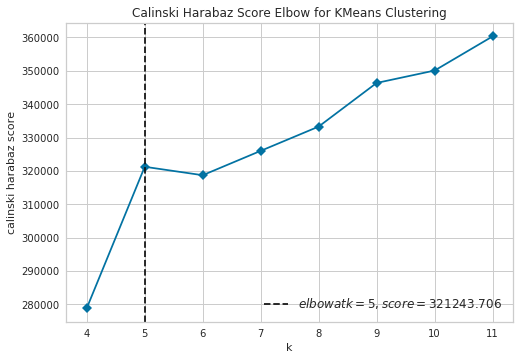

In [138]:
KMdl2=KMeans()
visualizer2 = KElbowVisualizer(
    KMdl2, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer2.fit(X)        # Fit the data to the visualizer
visualizer2.poof()   